MNIST CNN 

In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img,img_to_array
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#load data 
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#understanding the image
x_train[0].shape

(28, 28)

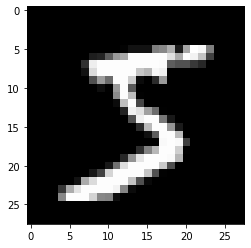

In [0]:

plt.imshow(x_train[0],cmap='gray')

In [0]:
y_train[0]

5

In [0]:

#preprocessing img data
img_height,img_width = 28,28

In [0]:
x_train = x_train.reshape(60000,img_height , img_width,1)
x_test = x_test.reshape(10000,img_height , img_width,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
#normalizing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [0]:
#compiling
cnn = Sequential()
cnn.add(Conv2D(32,kernel_size=(5,5),input_shape = (28,28,1),padding='same',activation= 'relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation= 'relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss = 'categorical_crossentropy' ,metrics=['accuracy'])


In [0]:
#train the model
history = cnn.fit(x_train,y_train,epochs=5,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.1390 - accuracy: 0.9561 - val_loss: 0.0471 - val_accuracy: 0.9847
Epoch 2/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 3/5
60000/60000 [==============================] - 12s 201us/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0228 - val_accuracy: 0.9934
Epoch 4/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0260 - val_accuracy: 0.9923
Epoch 5/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0195 - val_accuracy: 0.9939


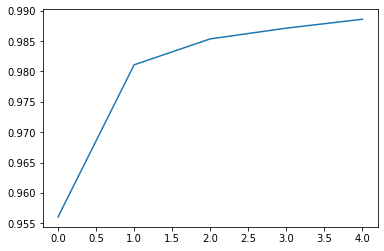

In [0]:
#accuracy and evaluation
plt.plot(history.history['accuracy'])



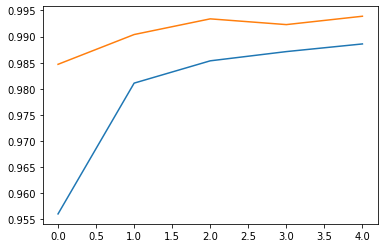

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])



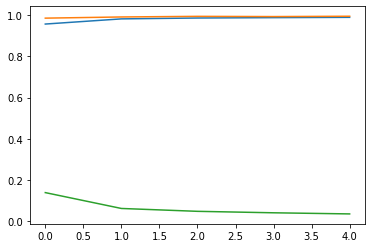

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [0]:
score = cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 90us/step


In [0]:
score

[0.05666073753641838, 0.9921000003814697]